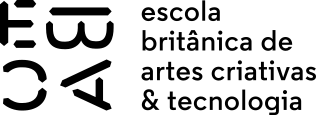





---


**Curso**: Ciência de dados;

**Módulo**: 11;

**Exercício**: 02;

**Futuro cientista de dados**: Lucas Cirilo dos Santos



---



## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import graphviz
import dtreeviz

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [88]:
df_database = pd.read_csv('https://raw.githubusercontent.com/dslucascirilo/EBAC/main/Data%20Science/M%C3%B3dulo%2011%20-%20A%CC%81rvores%20II%20(Parte%20I%20-%20a%CC%81rvore%20de%20regressa%CC%83o)/Database/housing.csv')
df = df_database

# Ensure the 'columns' list matches the actual columns in your DataFrame
columns = df.columns.tolist()

# df = pd.DataFrame(data=df.values, columns=columns)

df.to_csv(path_or_buf='california_clean_data.csv', index=False)

#dropping missing and strings

df.dropna(inplace=True)
df = df.drop('ocean_proximity', axis=1)

#separating the x and y collumns to train and test the tree

X = df.drop(columns='median_house_value')
y = df['median_house_value']

# how much collumns and lines are in the dataframe

print('Quantidade de linhas e colunas de X:', X.shape)
print('Quantidade de linhas de y:', len(y))

df

Quantidade de linhas e colunas de X: (20433, 8)
Quantidade de linhas de y: 20433


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [89]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [90]:
y.to_frame()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


Seeing the informations about the dataframe

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


Verifying if that is some missing data

In [92]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

Correlation matriz

In [93]:
df.corr().tail(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.0253,0.064894,0.688355,1.0


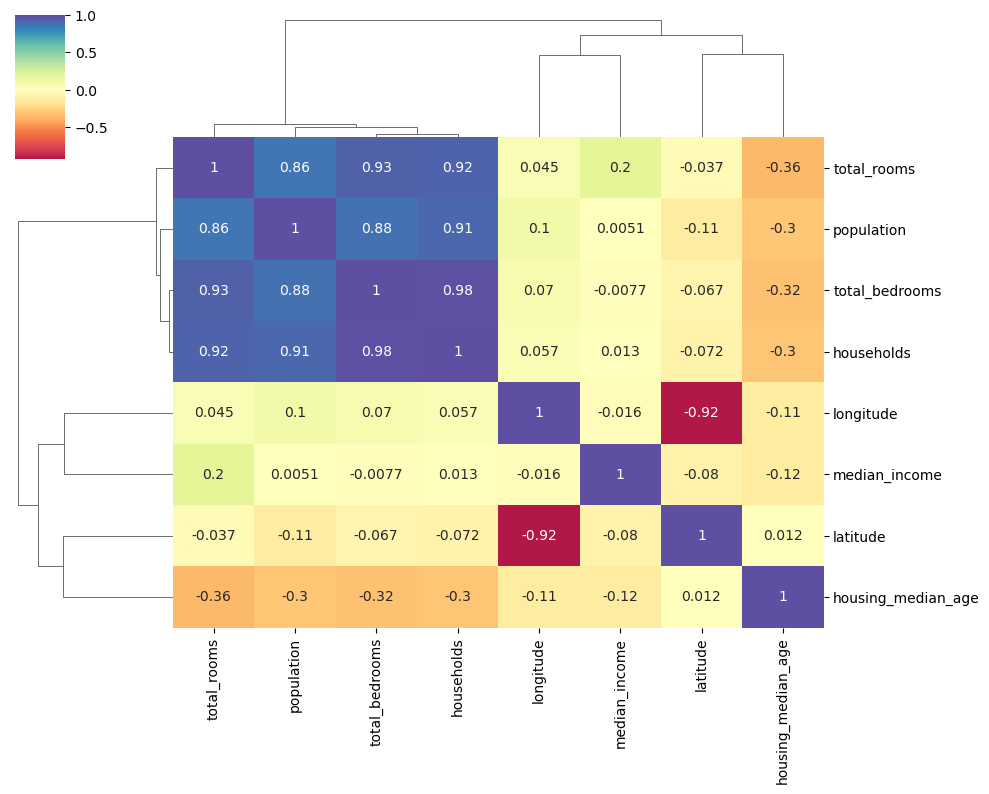

In [94]:
sns.clustermap(X.corr(),figsize = (10,8), center = 0, cmap = "Spectral", annot = True)

Separating the data in train and test

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2507)

dt_reg = DecisionTreeRegressor(max_depth=8, random_state=2507)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=2507)

In [96]:
# MSE 

print('Erro quadrático médio', 
      round(mean_squared_error(y_true=y_train, 
                               y_pred=tree_2.predict(X_train)),
                            2))


# Determination coefficient

print('Coeficiente de determinação (R- Quadrático):', 
      round(dt_reg.score(X=X_train, 
                         y=y_train), 
                      2))


Erro quadrático médio 7421158940.83
Coeficiente de determinação (R- Quadrático): 0.75


In [97]:
pd.concat(objs=[y_train.reset_index(drop=True), 
                pd.DataFrame(data=dt_reg.predict(X_train), 
                             columns=['Valor preditivo do imóvel']
                            )
               ], axis=1)

,median_house_value,Valor preditivo do imóvel
0,170300.0,213393.176707
1,63100.0,65788.059701
2,126300.0,131075.980392
3,195800.0,190962.295082
4,500001.0,496686.879397
...,...,...
15319,312300.0,276529.313131
15320,55000.0,88451.948052
15321,88900.0,109131.041667
15322,229600.0,237651.282051


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [98]:
path = dt_reg.cost_complexity_pruning_path(X=X_train, y=y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.17462803e+01, 2.58450796e+03, 1.03175846e+04,
        1.08078831e+04, 2.97517968e+04, 3.01540068e+04, 3.72866419e+04,
        7.35665278e+04, 7.54897546e+04, 7.70166895e+04, 8.15713913e+04,
        8.15713913e+04, 1.34154123e+05, 1.81734169e+05, 2.13173236e+05,
        2.23965131e+05, 2.36862152e+05, 2.49390847e+05, 2.91439626e+05,
        3.01214544e+05, 3.47690604e+05, 3.74368684e+05, 4.11872009e+05,
        4.24009793e+05, 4.42109143e+05, 4.54815975e+05, 5.41954679e+05,
        5.79564701e+05, 5.79884838e+05, 6.07283771e+05, 6.41805983e+05,
        7.08936821e+05, 7.58402320e+05, 8.03552947e+05, 8.25422435e+05,
        8.52179657e+05, 9.42611599e+05, 9.45153830e+05, 9.80407422e+05,
        1.04994054e+06, 1.10706431e+06, 1.12154227e+06, 1.34876299e+06,
        1.35954494e+06, 1.43345077e+06, 1.44855567e+06, 1.50134861e+06,
        1.51377361e+06, 1.65182067e+06, 1.66782275e+06, 1.67416472e+06,
        1.68158728e+06, 1.70413094e+06, 1.71117465

A impureza da árvore em função do Alpha

Text(0, 0.5, 'Impureza das Folhas')

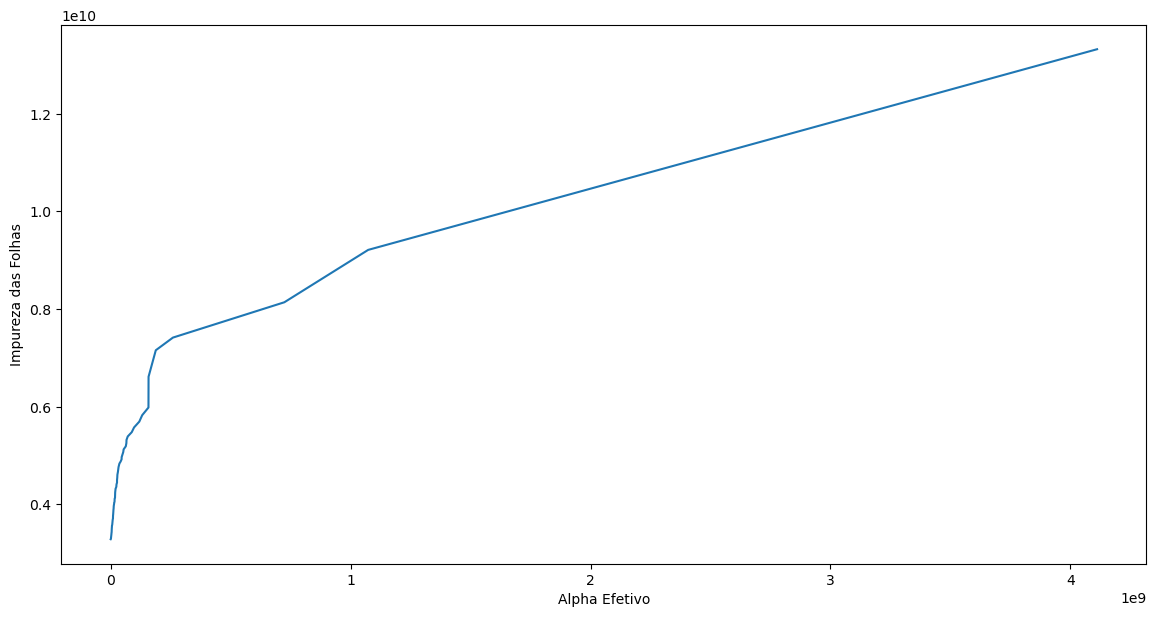

In [99]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize = ( 14, 7))
plt.plot(ccp_alphas, impurities)

plt.xlabel ('Alpha Efetivo')
plt.ylabel ('Impureza das Folhas')

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [100]:
clfs =[]


for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor (ccp_alpha = ccp_alpha , random_state = 2507)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    

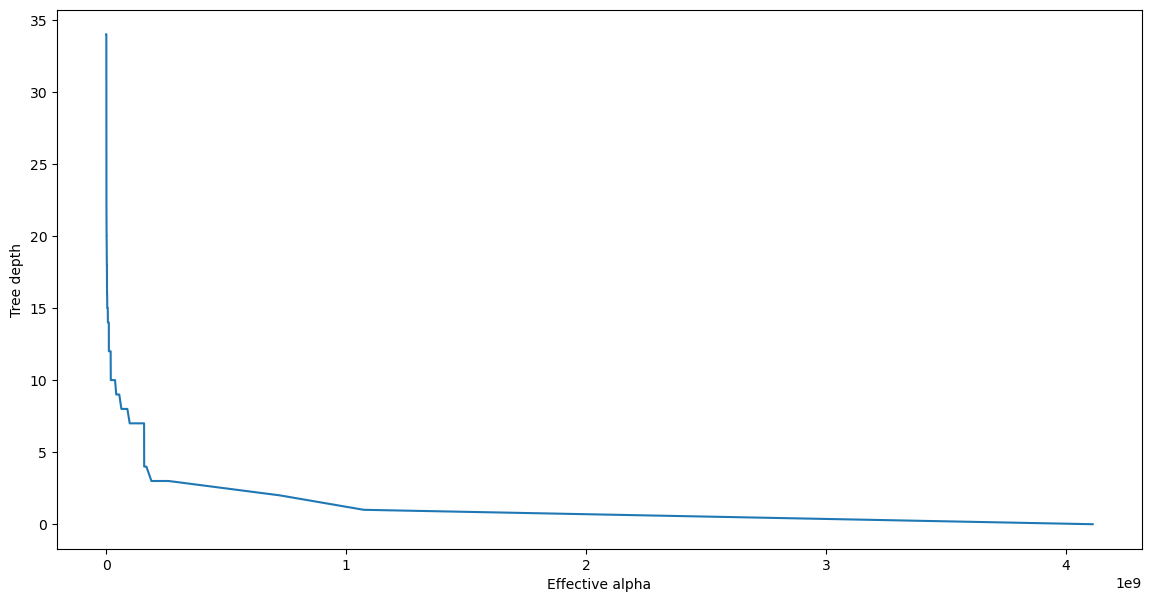

In [101]:
tree_depths = [clf.tree_.max_depth  for clf in clfs]

plt.figure(figsize = (14, 7))
plt.plot(ccp_alphas, tree_depths)

plt.xlabel(xlabel = 'Effective alpha')
plt.ylabel(ylabel = 'Tree depth')

plt.show()

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [102]:
train_scores = [mean_squared_error(y_true=y_train, 
                                   y_pred=clf.predict(X_train)) for clf in clfs]

test_scores = [mean_squared_error(y_true = y_test,
                                  y_pred = clf.predict(X_test)) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

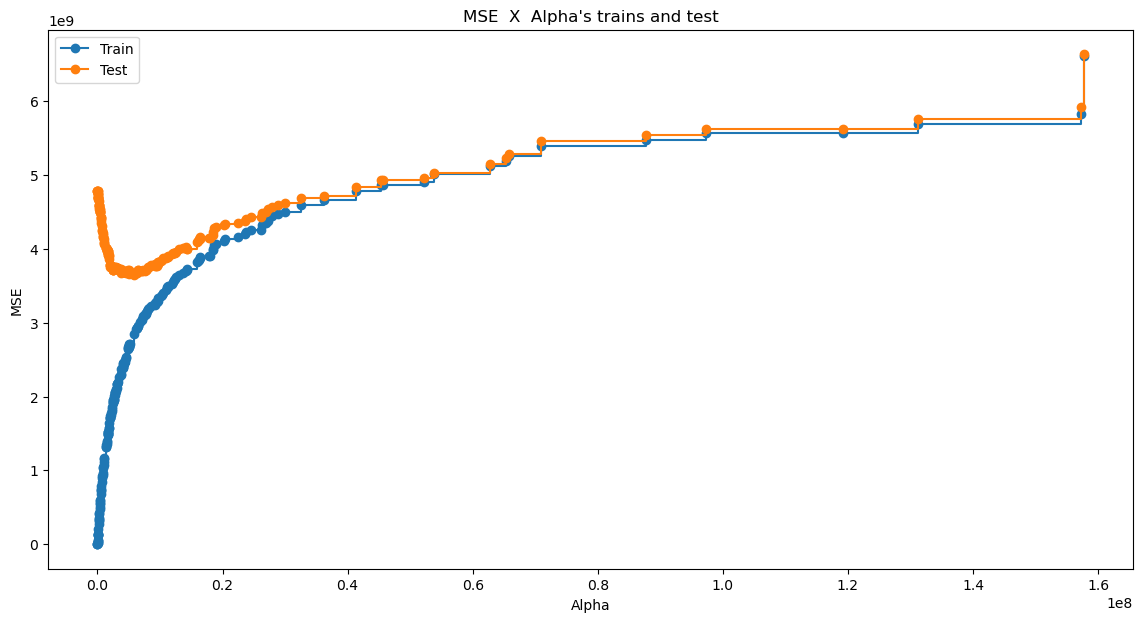

In [103]:
fig, ax = plt.subplots(figsize=(14,7))

ax.set_xlabel(xlabel='Alpha')
ax.set_ylabel(ylabel='MSE')
ax.set_title(label="MSE  X  Alpha's trains and test")

ax.plot(ccp_alphas[:-6], train_scores[:-6], 
        marker='o', label='Train', drawstyle='steps-post')

ax.plot(ccp_alphas[:-6], test_scores[:-6], 
        marker='o', label='Test', drawstyle='steps-post')

ax.legend()

plt.show()


In [104]:
df_ccp = pd.DataFrame(data={'ccp_alphas':ccp_alphas, 
                            'train_scores':train_scores, 
                            'test_scores':test_scores})

df_ccp.sort_values(by=['test_scores', 'train_scores'])

,ccp_alphas,train_scores,test_scores
118,5.879513e+06,2.849413e+09,3.649570e+09
115,5.075268e+06,2.695473e+09,3.660676e+09
120,6.354040e+06,2.928017e+09,3.668150e+09
119,6.206592e+06,2.909257e+09,3.668876e+09
116,5.092660e+06,2.705640e+09,3.669747e+09
...,...,...,...
202,1.878842e+08,7.156340e+09,7.050234e+09
203,2.592989e+08,7.156340e+09,7.050234e+09
204,7.237124e+08,8.139351e+09,7.872781e+09
205,1.073116e+09,9.212468e+09,9.174845e+09


In [105]:
ccp_alpha_min = df_ccp.sort_values(by = ['test_scores', 'train_scores']).iloc[0,0]
ccp_alpha_min

5879512.577281423

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [106]:
arvore_f = DecisionTreeRegressor(ccp_alpha = ccp_alpha_min, 
                                      random_state = 2507)

arvore_f.fit(X_train,
               y_train)


print(f'Profundidade: {arvore_f.tree_.max_depth}')
print(f'R-quadrado na base de testes: {arvore_f.score(X_test, y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, arvore_f.predict(X_test)):.2f}')

Profundidade: 15
R-quadrado na base de testes: 0.73
MSE na base de testes: 3649570070.09


### 7. Visualize esta árvore.

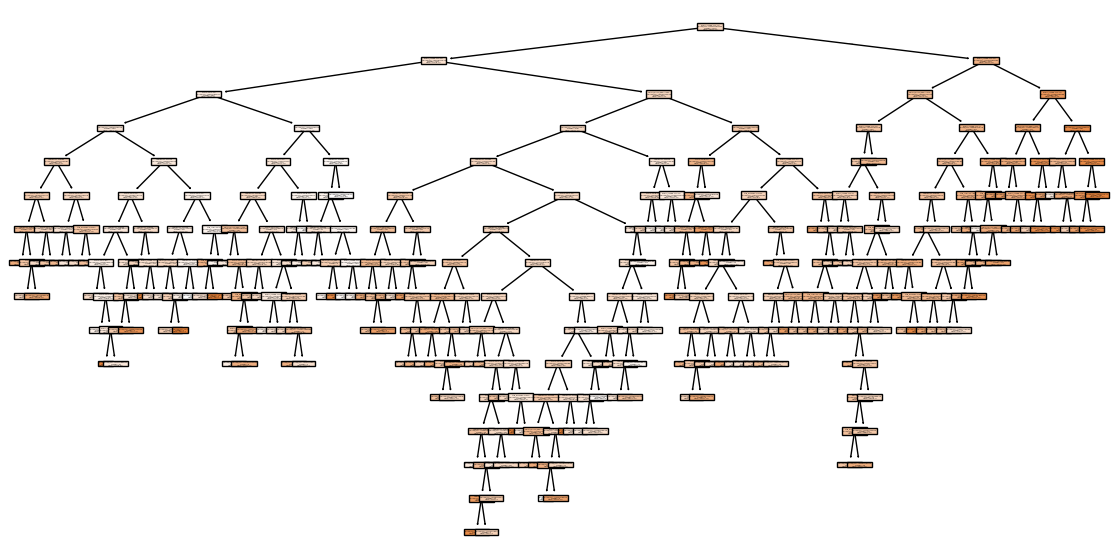

In [107]:
plt.rc('figure', 
       figsize = (14,7))

tree.plot_tree(decision_tree = arvore_f,
              feature_names = X.columns,
              filled = True);